In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
def read_dataset(filename="updated_dataset.json"):
    with open(filename, "r") as f:
        return json.load(f)

In [52]:
dataset = read_dataset()

In [54]:
# Load the data into a DataFrame
data = pd.DataFrame.from_dict(dataset, orient='index')

data['post_count'] = data['posts'].apply(lambda x: len(x))
data.drop(columns=['posts'], inplace=True)

# drop profile picture
data = data.drop(columns=['profile_picture_url'])

print(", ".join(data.columns))

name, biography, followers_count, follows_count, media_count, id, business_category_name, interests, post_count


In [96]:
# Some stats
stats = pd.DataFrame({
    'Total number of users': [len(data)],
    'Number of users with posts': [len(data[data['post_count'] > 0])],
    'Number of users with no posts': [len(data[data['post_count'] == 0])],
    'Max number of posts': [data['post_count'].max().astype(int)],
    'Min number of posts': [data['post_count'].min().astype(int)],
    'Mean number of posts': [data['post_count'].mean().astype(int)],
    'Total number of posts': [data['post_count'].sum().astype(int)]
}).transpose()
# remove header
stats.columns = ['']

# render 
stats

,
Total number of users,264
Number of users with posts,264
Number of users with no posts,0
Max number of posts,500
Min number of posts,1
Mean number of posts,155
Total number of posts,41130


In [73]:
# Make a set for interests
interests = set()

for i in data['interests']:
    i = i.replace(", ", ",").split(",")
    for interest in i:
        interests.add(interest)
interests = list(interests)
interests.sort()

print("Number of interests: {}".format(len(interests)))

Number of interests: 26


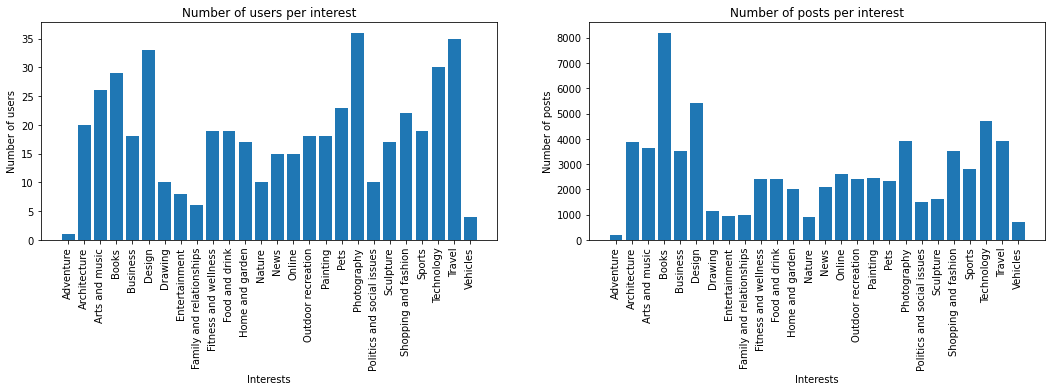

In [112]:
# Make a graph for the number of posts per interest
posts_count = []
for interest in interests:
    posts_count.append(data[data['interests'].str.contains(interest)]['post_count'].sum())

# Make a graph of the number of users per interest 
users_count = []
for interest in interests:
    users_count.append(len(data[data['interests'].str.contains(interest)]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# plot the graph with labels
ax1.bar(interests, users_count)
ax1.set_xticks(range(len(interests)))
ax1.set_xticklabels(interests, rotation=90)
ax1.set_xlabel("Interests")
ax1.set_ylabel("Number of users")
ax1.set_title("Number of users per interest")

# plot the graph with labels
ax2.bar(interests, posts_count)
ax2.set_xticks(range(len(interests)))
ax2.set_xticklabels(interests, rotation=90)
ax2.set_xlabel("Interests")
ax2.set_ylabel("Number of posts")
ax2.set_title("Number of posts per interest");